In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def polyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def polyLength(x, y):
    x1 = np.array(x)
    x2 = np.append(np.array(x[1:]),x[0])
    y1 = np.array(y)
    y2 = np.append(np.array(y[1:]),y[0])
    
    return np.sum(((x1-x2)**2 + (y1-y2)**2) ** 0.5)

def meanDistance(x, y):
    x1 = np.array(x)
    x2 = np.append(np.array(x[1:]),x[0])
    y1 = np.array(y)
    y2 = np.append(np.array(y[1:]),y[0])
    
    return np.mean(((x1-x2)**2 + (y1-y2)**2) ** 0.5)

def minDistance(x, y):
    x1 = np.array(x)
    x2 = np.append(np.array(x[1:]),x[0])
    y1 = np.array(y)
    y2 = np.append(np.array(y[1:]),y[0])
    
    return np.min(((x1-x2)**2 + (y1-y2)**2) ** 0.5)

def getScore(e):
    x = e[0]
    y = e[1]
    area = polyArea(x,y)
    length = polyLength(x,y)
    score = (100*area/length) ** 2 + meanDistance(x, y) ** 2
    return score

def plotFigure(x,y):
    #sns.scatterplot(x, y)
    ax = plt.gca()
    ax.set_aspect(1)
    area = polyArea(x,y)
    length = polyLength(x,y)
    f = getScore([x, y])
    
    ax.set_title("Area="+str(area)+". Length = " + str(length)+". f="+ str(f))
    plt.plot(np.append(x,x[0]), np.append(y,y[0]), linewidth=1)
    ax.set_aspect(1)
    plt.show()
  

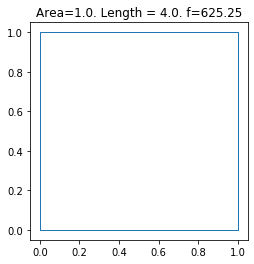

In [3]:
x = [0, 0.5, 1, 1, 1, 0.5, 0, 0]
y = [0, 0, 0, 0.5, 1, 1, 1, 0.5]
plotFigure(x,y)

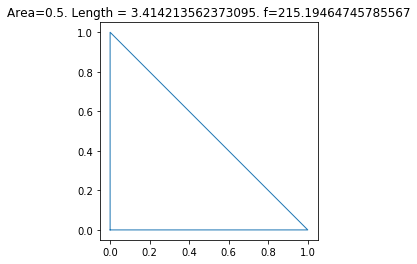

In [4]:
x = [0, 0.5, 1,  0]
y = [0, 0, 0, 1]
plotFigure(x, y)

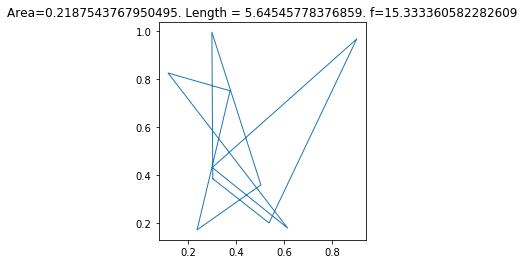

In [5]:
x = np.random.rand(10)
y = np.random.rand(10)
plotFigure(x,y)

In [6]:
np.random.rand(5,3,2)

array([[[0.57192581, 0.53346256],
        [0.69558949, 0.00513465],
        [0.71179449, 0.72148894]],

       [[0.38384835, 0.76676953],
        [0.63310291, 0.15254142],
        [0.56512535, 0.47481532]],

       [[0.67588977, 0.54511686],
        [0.92504794, 0.13616266],
        [0.70135936, 0.98029745]],

       [[0.68029387, 0.30059327],
        [0.12421531, 0.14599851],
        [0.60057732, 0.03753061]],

       [[0.41020542, 0.11844728],
        [0.34756472, 0.44706918],
        [0.23028538, 0.26088722]]])

In [7]:
number_of_dots = 20
population_size = 5

new_population = np.random.rand(population_size, 2, number_of_dots)

In [8]:
scores = []
for e in new_population:
    x = e[0]
    y = e[1]
    area = polyArea(x,y)
    length = polyLength(x,y)
    f = area/length
    scores.append(f)

In [9]:
def fun(x):
    return x**2

In [10]:
a = np.array([1,2,3])

In [11]:
a = np.array(list(map(getScore, new_population)))
print(a)


[ 9.41175358  4.31226886  2.865483    9.16283743 17.55093767]


In [12]:
v,f = a.argsort()[-2:][::-1]

In [13]:
np.

SyntaxError: invalid syntax (<ipython-input-13-df0eca0bfa5c>, line 1)

In [14]:
np.delete(a, np.where(a==np.max(a)))

array([9.41175358, 4.31226886, 2.865483  , 9.16283743])

In [18]:
def getParents(population):
    scores = np.array(list(map(getScore, population)))
    parent1_id, parent2_id = a.argsort()[-2:][::-1]
    return population[parent1_id], population[parent2_id]

def getParent(population):
    scores = np.array(list(map(getScore, population)))
    parent_id = np.where(scores==np.max(scores))
    return population[parent_id]

def makeKids(parentA, parentB, num_of_kids = population_size):
    kid_basis = (0.5*parentA+0.5*parentB)
    kids = np.zeros([num_of_kids, kid_basis.shape[0], kid_basis.shape[1]])
    for i in range(num_of_kids):
        kids[i] = kid_basis + kid_basis * (0.15 * np.random.random(kid_basis.shape)-0.5)
        
    return kids

def getPopulationB(population):
    return population + population * (0.15 * np.random.random(population.shape)-0.5)

def getRandomPopulationB(population):
    return np.random.rand(population_size, 2, number_of_dots)

In [19]:
from IPython.display import clear_output
import time

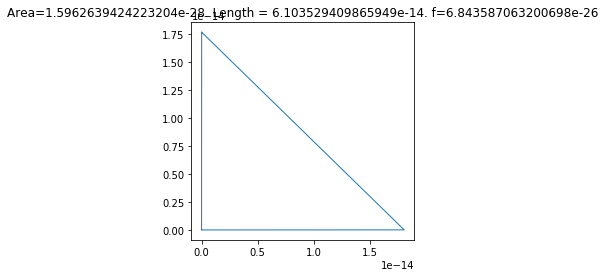

In [24]:
number_of_dots = 10
population_size = 1000

#new_population = np.random.rand(population_size, 2, number_of_dots)
generations = 50
num_iter = 5
#populationA = new_population
bestParents = np.zeros([num_iter, 2, number_of_dots])

for i in range(num_iter):
    populationA = np.random.rand(population_size, 2, number_of_dots)
    for g in range(generations):
        print("Iteration ", i)
        print("Generation = ", g)
        populationB = getPopulationB(populationA)
        parentA = getParent(populationA)[0]
        parentB = getParent(populationB)[0]
        populationA = makeKids(parentA, parentB)
        clear_output(wait=True)
        plotFigure(parentA[0], parentA[1])
        if g == 0:
            bestParent = parentA
        elif getScore(parentA)>getScore(bestParent):
            bestParent = parentA
        #time.sleep(0.05)
    bestParents[i]=bestParent


In [21]:
s = 0.5
l = 1+1+2**0.5
s/l

0.14644660940672624

In [22]:
s = np.pi
l = 2*np.pi
s/l

0.5

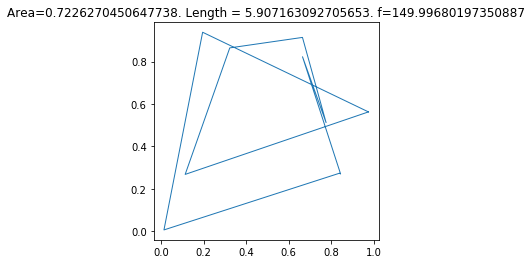

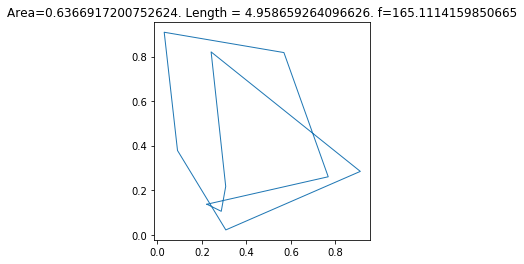

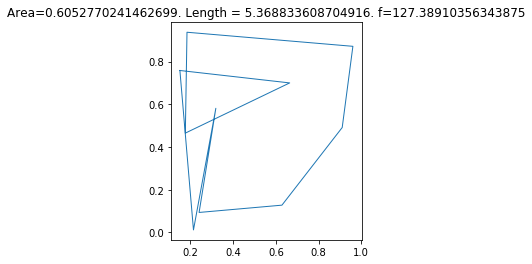

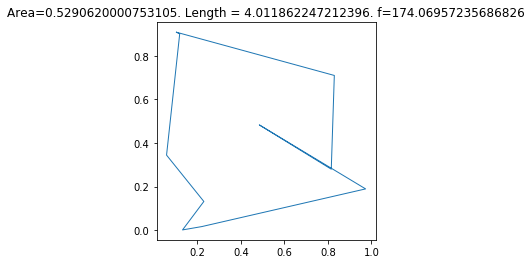

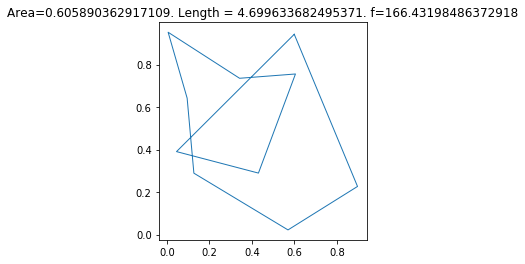

In [26]:

for p in bestParents:
    plotFigure(p[0], p[1])